## I. Import Libraries and Preferences

### Libraries

In [1]:
# System
import warnings

# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

### Preferences

In [2]:
# Suppress warnings
warnings.filterwarnings('ignore')

# Set the default Seaborn style
sns.set_theme(style='whitegrid', font='serif')

## II. Exploratory Data Analysis

In [3]:
DATASET_URL = '../datasets/raw/mushroom.csv'

In [4]:
data = pd.read_csv(DATASET_URL)
data.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [6]:
data.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


### Visualization

In [7]:
# Map the class labels to 0 and 1
class_map = data['class'].map({0: 'blue', 1: 'red'})

#### Mushroom Cap Diameter vs Stem Height by Class

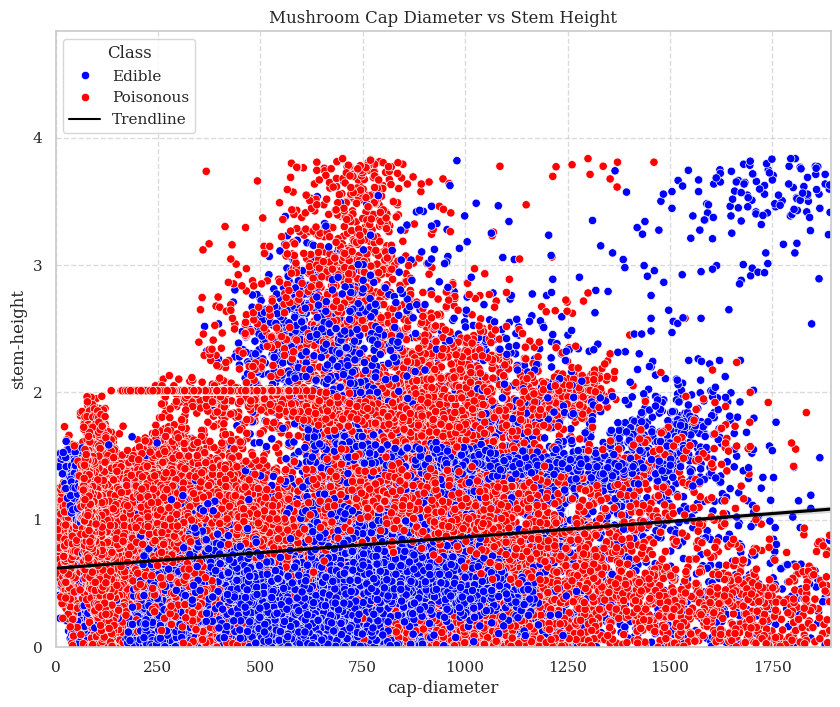

In [8]:
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(data=data, x='cap-diameter', y='stem-height', hue='class', palette={0: 'blue', 1: 'red'}) 
plt.title('Mushroom Cap Diameter vs Stem Height')
plt.xlabel('Cap Diameter')
plt.ylabel('Stem Height')

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Customize the legend
handles, labels = scatter.get_legend_handles_labels()
labels = ['Edible', 'Poisonous']

# Add trendline to the legend
trendline = mlines.Line2D([], [], color='black', label='Trendline')
handles.append(trendline)
labels.append('Trendline')

# Place legend inside the graph at the upper left corner
plt.legend(handles=handles, title='Class', labels=labels, loc='upper left', bbox_to_anchor=(0, 1))

plt.xlim(0, data['cap-diameter'].max() + 1)
plt.ylim(0, data['stem-height'].max() + 1)

# Add a trend line
sns.regplot(data=data, x='cap-diameter', y='stem-height', scatter=False, ax=scatter.axes, color='black')

# Show the plot
plt.show()

##### Mushroom Cap Diameter vs Stem Width by Class

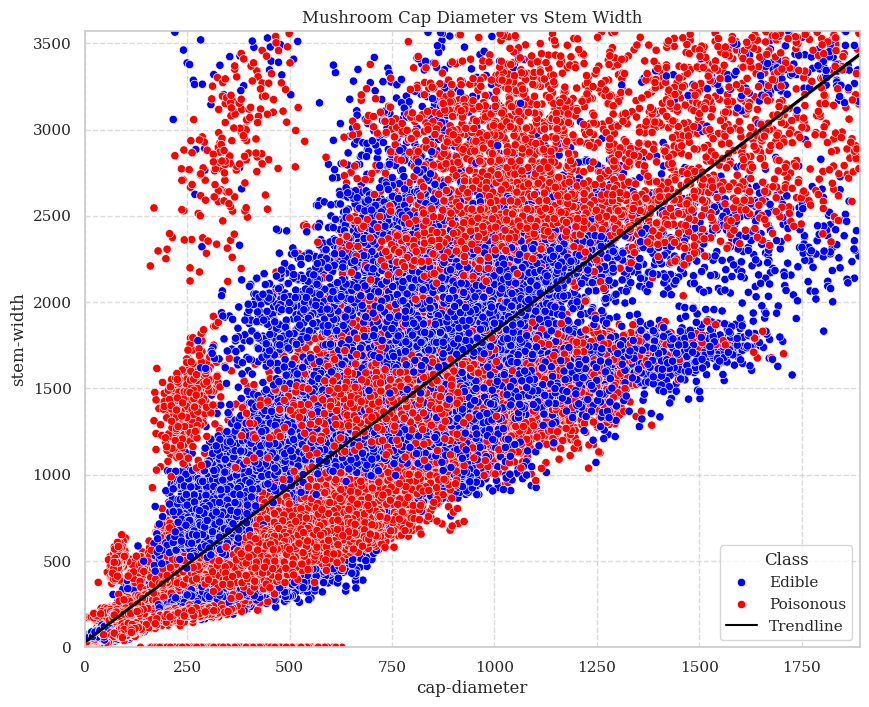

In [9]:
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(data=data, x='cap-diameter', y='stem-width', hue='class', palette={0: 'blue', 1: 'red'})
plt.title('Mushroom Cap Diameter vs Stem Width')
plt.xlabel('Cap Diameter')
plt.ylabel('Stem Width')

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Customize the legend
handles, labels = scatter.get_legend_handles_labels()
labels = ['Edible', 'Poisonous']
trendline = mlines.Line2D([], [], color='black', label='Trendline')
handles.append(trendline)
labels.append('Trendline')

# Place legend inside the graph at the bottom right corner
plt.legend(handles=handles, title='Class', labels=labels, loc='lower right', bbox_to_anchor=(1, 0))

plt.xlim(0, data['cap-diameter'].max() + 1)
plt.ylim(0, data['stem-width'].max() + 1)

# Add a trend line
sns.regplot(data=data, x='cap-diameter', y='stem-width', scatter=False, ax=scatter.axes, color='black')

# Show the plot
plt.show()

#### Mushroom Stem Height vs Stem Width by Class

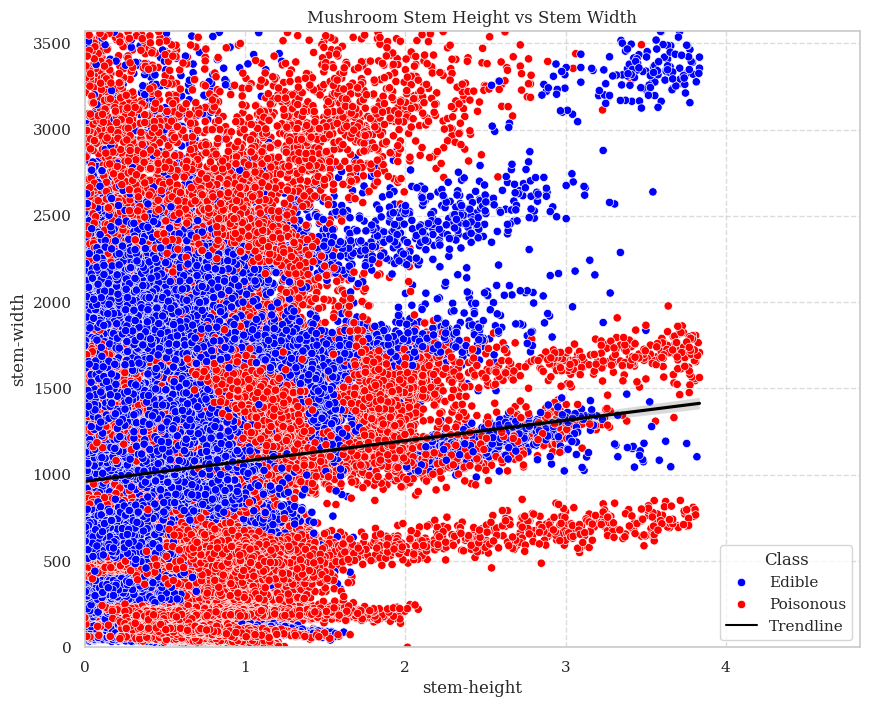

In [10]:
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(data=data, x='stem-height', y='stem-width', hue='class', palette={0: 'blue', 1: 'red'}) 
plt.title('Mushroom Stem Height vs Stem Width')
plt.xlabel('Stem Height')
plt.ylabel('Stem Width')

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Customize the legend
handles, labels = scatter.get_legend_handles_labels()
labels = ['Edible', 'Poisonous']
trendline = mlines.Line2D([], [], color='black', label='Trendline')
handles.append(trendline)
labels.append('Trendline')

plt.legend(handles=handles, title='Class', labels=labels, loc='lower right', bbox_to_anchor=(1, 0))

plt.xlim(0, data['stem-height'].max() + 1)
plt.ylim(0, data['stem-width'].max() + 1)

# Add a trend line
sns.regplot(data=data, x='stem-height', y='stem-width', scatter=False, ax=scatter.axes, color='black')

# Show the plot
plt.show()

#### Relationship of Mushroom Features

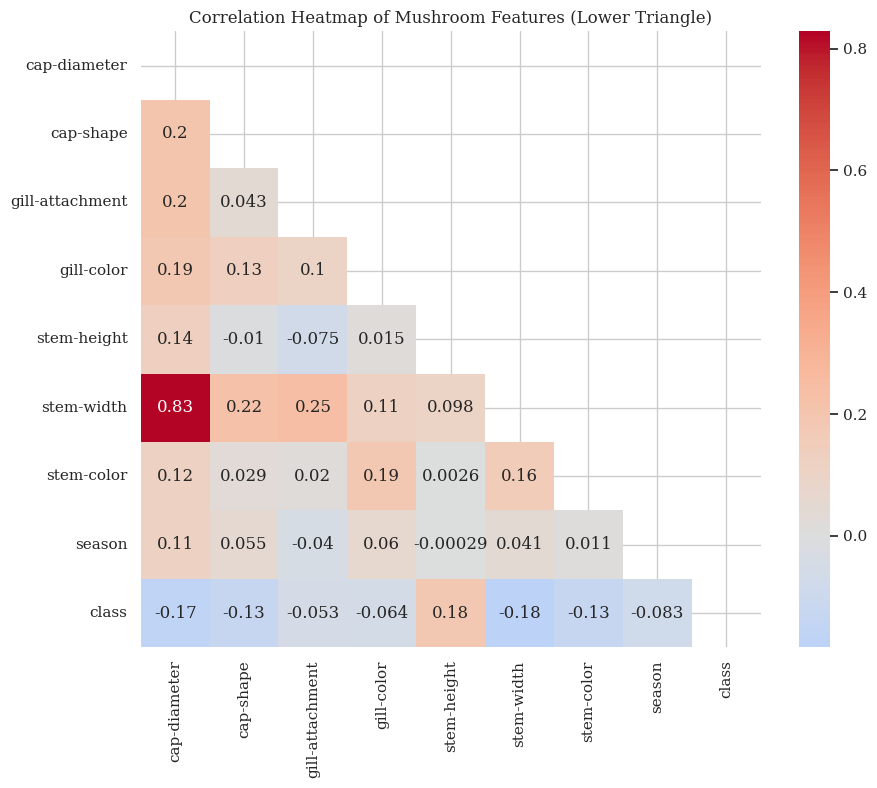

In [11]:
plt.figure(figsize=(10, 8))
corr = data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, mask=mask)
plt.title('Correlation Heatmap of Mushroom Features (Lower Triangle)')

# Show the plot
plt.show()